### Drug Target Analysis from Klaeger et al. Science 2017 established drug targets

In [282]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tools import networkHelpers as nh
%matplotlib inline

In [283]:
dat = pd.read_excel('../data/Klaeger_Science_2017 Supplementary Table 2 Target Lists.xlsx', sheet_name='Kinobeads')


columns = new_dat.columns
display(columns)

dat.head()

,Drug,Lysate,Beads,Gene Name,Relative Intensity DMSO,Relative Intensity 3 nM,Relative Intensity 10 nM,Relative Intensity 30 nM,Relative Intensity 100 nM,Relative Intensity 300 nM,...,Bottom,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification
0,Abemaciclib,4 cell line mix,Kinobeads,AAK1,1,0.905556,0.791054,0.738292,0.639565,0.323354,...,0.009092,0.957905,151.288760,151.288760,45.696999,0.673073,101.828368,0.985386,-20.503519,High confidence
1,Abemaciclib,4 cell line mix,Kinobeads,ADCK1,1,1.045974,0.869866,1.141565,0.000000,0.000000,...,-0.001200,1.014355,63.935536,63.935536,68.832970,0.622595,39.805937,0.983520,-12.606135,High confidence
2,Abemaciclib,4 cell line mix,Kinobeads,BMP2K,1,1.101696,1.012297,1.087891,0.973740,0.863230,...,-1.003278,1.034558,84774.108960,84774.108960,217756.243215,0.660952,56031.642989,0.937247,-15.330485,High confidence
3,Abemaciclib,4 cell line mix,Kinobeads,CAMK2D,1,0.894551,0.984481,0.900583,0.440384,0.178266,...,0.018690,0.972850,95.373379,95.373379,12.131433,0.203913,19.447883,0.992088,-22.486948,High confidence
4,Abemaciclib,4 cell line mix,Kinobeads,CAMK2G,1,1.125435,1.565245,1.236451,0.315507,0.139777,...,0.043265,1.232332,82.363844,82.363844,NaN,0.217204,17.889794,0.939239,1.734623,High confidence


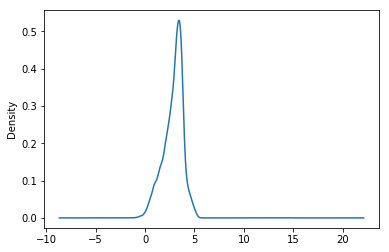

In [285]:
kd_log = new_dat['Apparent Kd'].apply(lambda x: np.log(x))
std = kd_log.std()
(kd_log/std).plot.kde()

In [287]:
cols_to_keep = ['Drug', 'Gene Name', 'R2', 'Target Classification']
dat = dat[cols_to_keep]
dat.head()

,Drug,Gene Name,R2,Target Classification
0,Abemaciclib,AAK1,0.985386,High confidence
1,Abemaciclib,ADCK1,0.983520,High confidence
2,Abemaciclib,BMP2K,0.937247,High confidence
3,Abemaciclib,CAMK2D,0.992088,High confidence
4,Abemaciclib,CAMK2G,0.939239,High confidence


In [289]:
double_drug_targets = dat[dat['Gene Name'].apply(lambda x: ';' in x)]
#double_drug_targets.shape

first_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[0])
second_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[1])

repaired_double_targets = double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':first_genes})
repaired_double_targets = repaired_double_targets.append(double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':second_genes})) 
repaired_double_targets = repaired_double_targets[cols_to_keep]

dat = dat.drop(double_drug_targets.index).append(repaired_double_targets)
dat.head()

In [291]:
genes_targeted = pd.unique(dat['Gene Name'])
len(genes_targeted)

531

In [292]:
louvain_tier1 = pd.read_csv('../results/louvain_clusters.txt', sep='\t')
len(set(louvain_tier1['names']) & set(genes_targeted))

238

In [293]:
kmast = pd.read_excel('../data/KINASESmasterlist_w_Aliases.xlsx')
kmast.head()

,Uniprot Protein,MS Gene,RNAseq Gene,RNAseq Accession,Family,Mouse Uniprot Protein,Mouse RNAseq gene,Mouse RNAseq Accession,Kinome Render Tree Name,Aliases (Conservative),...,Aliases,description,other_designations,Entrez_Symbol,Old_Name,Entrez_Synonyms,Entrez_other_designations,Unnamed: 18,Gene Symbol,Gene Symbol and Synonyms
0,AAK1,AAK1,AAK1,22848.0,Other,Aak1,Aak1,269774,AAK1,"AAK1,",...,NaN,AP2 associated kinase 1,adaptor-associated kinase 1,AAK1,AAK1,KIAA1048|MGC138170,adaptor-associated kinase 1,NaN,AAK1,AAK1
1,AAPK1,PRKAA1,PRKAA1,5562.0,CAMK,Aapk1,Prkaa1,105787,AMPK[alpha]1,"PRKAA1, AMPKa1",...,"AMPK, AMPKa1","protein kinase, AMP-activated, alpha 1 catalyt...","5'-AMP-activated protein kinase, catalytic alp...",PRKAA1,AMPKa1,AMPK|AMPKa1|MGC33776|MGC57364,"5'-AMP-activated protein kinase, catalytic alp...",NaN,PRKAA1,"AMPK, PRKAA1, AMPKa1"
2,AAPK2,PRKAA2,PRKAA2,5563.0,CAMK,Aapk2,Prkaa2,108079,AMPK[alpha]2,"PRKAA2, AMPK2, AMPKa2, PRKAA",...,"AMPK, AMPK2, AMPKa2, PRKAA","protein kinase, AMP-activated, alpha 2 catalyt...","5'-AMP-activated protein kinase, catalytic alp...",PRKAA2,AMPKa2,AMPK|AMPK2|PRKAA,"5'-AMP-activated protein kinase, catalytic alp...",NaN,PRKAA2,"AMPK2, AMPK, PRKAA, AMPKa2, PRKAA2"
3,ABL1,ABL1,ABL1,25.0,TK,Abl1,Abl1,11350,Abl,"ABL1,ABL, JTK7, bcr/abl, c-ABL, c-ABL1, v-abl",...,"ABL, JTK7, bcr/abl, c-ABL, c-ABL1, p150, v-abl","ABL proto-oncogene 1, non-receptor tyrosine ki...",Abelson tyrosine-protein kinase 1|bcr/c-abl on...,ABL1,ABL,ABL|JTK7|c-ABL|p150|v-abl,Abelson murine leukemia viral (v-abl) oncogene...,NaN,ABL1,"c-ABL1, p150, ABL, JTK7, v-abl, bcr/abl, c-ABL..."
4,ABL2,ABL2,ABL2,27.0,TK,Abl2,Abl2,11352,Arg,"ABL2,ABLL, ARG",...,"ABLL, ARG","ABL proto-oncogene 2, non-receptor tyrosine ki...","abelson-related gene protein|c-abl oncogene 2,...",ABL2,ARG,ABLL|ARG,Abelson murine leukemia viral (v-abl) oncogene...,NaN,ABL2,"ABL2, ABLL, ARG"


In [294]:
best_col = 'Uniprot Protein'
best_num = len(set(kmast[best_col]) & set(louvain_tier1['names']))
for c in kmast.columns:
    temp_set = set(alias[c])
    temp_len = len(set(alias[c]) & set(louvain_tier1['names']))
    if temp_len > best_num:
        best_col = c
        best_num = temp_len
        
print(best_col, best_num)

RNAseq Gene 473


In [295]:
best_col = 'Uniprot Protein'
best_num = len(set(alias[best_col]) & set(genes_targeted))
for c in kmast.columns:
    temp_set = set(kmast[c])
    temp_len = len(set(kmast[c]) & set(genes_targeted))
    if temp_len > best_num:
        best_col = c
        best_num = temp_len
        
print(best_col, best_num)

MS Gene 249


In [298]:
from collections import Counter

MS_to_RNAseq_mapper = alias.set_index('MS Gene')['RNAseq Gene'].to_dict()
targeted_kinases = list(map(lambda x: MS_to_RNAseq_mapper[x], list(set(alias[best_col]) & set(genes_targeted))))
len(targeted_kinases)

249

In [299]:
raw_counts_klaeger = Counter(dat['Gene Name'])

targeted_kinase_counts = {MS_to_RNAseq_mapper[gen]:count for gen,count in raw_counts_klaeger.items() if gen in targeted_kinases}


In [300]:
#pd.Series(targeted_kinase_counts).to_csv('../results/targeted_kinase_counts.csv', sep=',')

### Understudied

In [301]:
understudied = pd.read_csv('../data/understudied_kinases.csv', header=None)[0]
understudied

0        AAK1 
1        CDKL4
2         AATK
3        STK38
4      MAP3K15
5         NEK8
6       PRPF4B
7       STK36 
8          CIT
9        ADCK1
10      STK38L
11      MAP3K2
12        NEK9
13         PXK
14        CLK1
15        CLK2
16        CLK3
17        CLK4
18       DAPK1
19       DAPK2
20       DAPK3
21        DMPK
22       DSTYK
23      DYRK1A
24      DYRK1B
25       DYRK2
26       DYRK3
27       DYRK4
28       EEF2K
29        ERN1
        ...   
198       SBK2
199      SCYL1
200      SCYL2
201      SCYL3
202     SGK071
203     SGK110
204     SGK196
205     SGK223
206     SGK494
207       SIK1
208       SIK2
209       SIK3
210        SLK
211       SNRK
212       SPEG
213       SRMS
214      SRPK1
215      SRPK2
216      SRPK3
217      STK10
218      STK16
219     STK17A
220     STK17B
221      STK24
222      STK25
223      STK31
224     STK32A
225     STK32B
226     STK32C
227      STK33
Name: 0, Length: 228, dtype: object

In [302]:
under_best_col = 'Uniprot Protein'
best_num = len(set(alias[under_best_col]) & set(understudied))
for c in alias.columns:
    temp_set = set(alias[c])
    temp_len = len(set(alias[c]) & set(understudied))
    if temp_len > best_num:
        under_best_col = c
        best_num = temp_len
        
print(under_best_col, best_num)

MS Gene 226


In [303]:
present_understudied = list(set(alias[under_best_col]) & set(understudied))

In [304]:
louvain_tier2 = pd.read_csv('../results/louvain_small_clusters.txt', sep='\t')
louvain_tier2.head()

,names,cluster
0,PAK1,3
1,ERBB2,18
2,MST1R,18
3,YES1,18
4,TYRO3,18


In [305]:
louv= louvain_tier1.merge(louvain_tier2.set_index('names'), how='left', on='names', suffixes=['_super', '_sub'])
louv.head()

,names,cluster_super,cluster_sub
0,PAK1,5,3
1,ERBB2,5,18
2,MST1R,5,18
3,YES1,5,18
4,TYRO3,5,18


In [306]:
from copy import copy 
present_understudied = [MS_to_RNAseq_mapper[gen] for gen in present_understudied]
counts_updated = copy(targeted_kinase_counts)
counts_updated.update({gen:0 for gen in louv['names'] if gen not in counts_updated})

louv['understudied'] = louv['names'].isin(present_understudied)*1
louv['target_count'] = louv['names'].apply(lambda x: counts_updated[x])
louv.head()

,names,cluster_super,cluster_sub,understudied,target_count
0,PAK1,5,3,0,0
1,ERBB2,5,18,0,0
2,MST1R,5,18,0,18
3,YES1,5,18,0,33
4,TYRO3,5,18,0,0


In [307]:
louv.head()

,names,cluster_super,cluster_sub,understudied,target_count
0,PAK1,5,3,0,0
1,ERBB2,5,18,0,0
2,MST1R,5,18,0,18
3,YES1,5,18,0,33
4,TYRO3,5,18,0,0


In [308]:
sub_counts = louv.groupby('cluster_sub').count()['names']
sub_counts.columns = ['count']

sub_grouping = louv.groupby('cluster_sub').agg({
    'cluster_super':'mean',
    'understudied':'sum',
    'target_count':'sum'
})
sub_grouping['count'] = sub_counts
#sub_grouping
sub_grouping

,cluster_super,understudied,target_count,count
cluster_sub,,,,
1,4,2,20,2
2,7,7,257,30
3,5,2,47,8
4,2,8,253,41
5,5,1,126,8
6,4,60,730,88
7,1,9,38,12
8,1,0,74,8
9,2,5,265,18


In [309]:
super_clusts = louv.set_index('cluster_super')['cluster_sub'].apply(lambda x: str(x)).groupby('cluster_super').agg(lambda x: ' '.join(x))
super_dict = super_clusts.apply(lambda x: list(set(x.split(' ')))).to_dict()

sub_sizes_dict = sub_grouping['count'].to_dict()
print(sub_sizes_dict)

super_dict = {x:sorted(y, key=lambda p: sub_sizes_dict[int(p)], reverse=True) for x,y in super_dict.items()}
super_dict

{1: 2, 2: 30, 3: 8, 4: 41, 5: 8, 6: 88, 7: 12, 8: 8, 9: 18, 10: 2, 11: 23, 12: 35, 13: 27, 14: 2, 15: 2, 16: 4, 17: 4, 18: 60, 19: 5, 20: 5, 21: 9, 22: 4, 23: 2, 24: 5, 25: 8, 26: 7, 27: 4, 28: 2, 29: 2, 30: 4, 31: 2, 32: 5, 33: 17, 34: 2, 35: 14, 36: 2}


{1: ['7', '8', '26'],
 2: ['4', '9', '21', '20', '10'],
 3: ['12', '11'],
 4: ['6',
  '13',
  '24',
  '32',
  '16',
  '17',
  '27',
  '34',
  '15',
  '1',
  '36',
  '23',
  '28',
  '14'],
 5: ['18', '35', '25', '3', '5', '31', '29'],
 6: ['19'],
 7: ['2', '33', '22'],
 8: ['30']}

In [310]:
super_sizes = sub_grouping.set_index('cluster_super').groupby('cluster_super')['count'].sum()
super_sizes
#sorted_super, __ =  zip(*sorted())

cluster_super
1     27
2     75
3     58
4    151
5    102
6      5
7     51
8      4
Name: count, dtype: int64

In [311]:
super_size_list, sorted_super_list = zip(*sorted(tuple(zip(super_sizes, super_sizes.index)), reverse=True))
super_size_list = list(super_size_list)
sorted_super_list = list(sorted_super_list)
print(super_size_list,sorted_super_list)

[151, 102, 75, 58, 51, 27, 5, 4] [4, 5, 2, 3, 7, 1, 6, 8]


In [312]:
number_smalls = [len(super_dict[x]) for x in sorted_super_list]
number_smalls

[14, 7, 5, 2, 3, 3, 1, 1]

In [313]:
location_start = [sum(number_smalls[0:i])+i*2.5 for i in range(len(number_smalls))]
location_start

[0.0, 16.5, 26.0, 33.5, 38.0, 43.5, 49.0, 52.5]

In [314]:
locations_sub_list = [[(super_dict[sorted_super_list[j]][i],i+location_start[j]) for i in range(len(super_dict[sorted_super_list[j]]))] for j in range(len(sorted_super_list))]
#locations_sub_list

In [315]:
locations_sub_dict = dict([x for y in locations_sub_list for x in y])
#locations_sub_dict

In [316]:
sub_grouping['prop_understudied'] = sub_grouping['understudied']*1.0/sub_grouping['count']
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied
cluster_sub,,,,,
1,4,2,20,2,1.000000
2,7,7,257,30,0.233333
3,5,2,47,8,0.250000
4,2,8,253,41,0.195122
5,5,1,126,8,0.125000


In [317]:
#sub_grouping['target_count'] = sub_grouping['target_count']
#sub_grouping.head()

In [318]:
sub_grouping['location'] = [locations_sub_dict[str(x)] for x in list(sub_grouping.index)]
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied,location
cluster_sub,,,,,,
1,4,2,20,2,1.000000,9.0
2,7,7,257,30,0.233333,38.0
3,5,2,47,8,0.250000,19.5
4,2,8,253,41,0.195122,26.0
5,5,1,126,8,0.125000,20.5


In [319]:
sub_grouping['normalized_target_count'] = sub_grouping['target_count']*1.0/sub_grouping['count']
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied,location,normalized_target_count
cluster_sub,,,,,,,
1,4,2,20,2,1.000000,9.0,10.000000
2,7,7,257,30,0.233333,38.0,8.566667
3,5,2,47,8,0.250000,19.5,5.875000
4,2,8,253,41,0.195122,26.0,6.170732
5,5,1,126,8,0.125000,20.5,15.750000


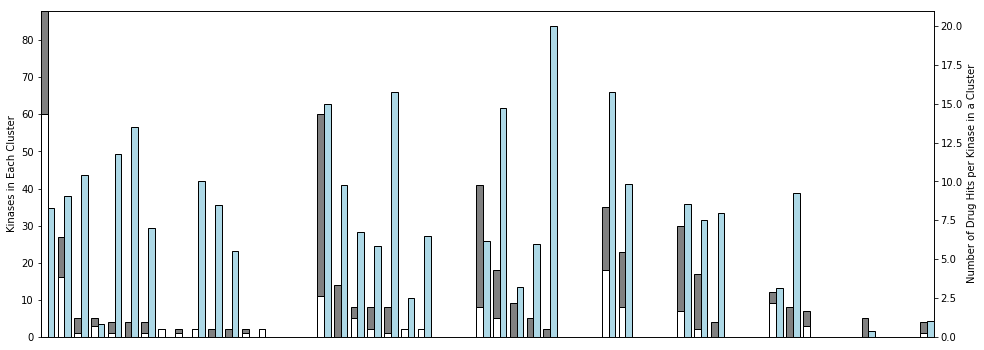

In [320]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,6))

ax.bar(sub_grouping['location']-0.4, 
       sub_grouping['understudied'],
       width=0.4,
       color='w',
       align='center',
       edgecolor='k')

ax.bar(sub_grouping['location']-0.4, 
       sub_grouping['count']-sub_grouping['understudied'],
       bottom=sub_grouping['understudied'],
       width=0.4,
       color='gray',
       align='center',
       edgecolor='k')

plt.ylabel('Kinases in Each Cluster')

## make the second plot

ax2 = ax.twinx()
ax2.bar(sub_grouping['location'], 
       sub_grouping['normalized_target_count'],
       width=0.4,
       color='lightblue',
       align='center',
       edgecolor='k')

plt.ylabel('Number of Drug Hits per Kinase in a Cluster')

ax.autoscale(tight=True)

#ax2.set_yscale('log')


#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

plt.xlabel('Subcluster Number')

plt.show()

### Precision and 


In [322]:
drug_list = sorted(list(dat['Drug'].unique()))
num_drugs = len(drug_list)


dat.head()

,Drug,Gene Name,R2,Target Classification
0,Abemaciclib,AAK1,0.985386,High confidence
1,Abemaciclib,ADCK1,0.983520,High confidence
2,Abemaciclib,BMP2K,0.937247,High confidence
3,Abemaciclib,CAMK2D,0.992088,High confidence
4,Abemaciclib,CAMK2G,0.939239,High confidence


In [455]:
len(set(dat['Gene Name']))

531

In [454]:
len(set(hgnc_mapper.keys()) & set(dat['Gene Name']))

529

In [457]:
from copy import copy

# old temp dat before hgnc
# temp_dat = copy(dat[dat['Gene Name'].isin(list(set(alias[best_col]) & set(genes_targeted)))])
#names = temp_dat['Gene Name'].apply(lambda x: MS_to_RNAseq_mapper[x])

# after hgnc
temp_dat = copy(dat[dat['Gene Name'].isin(hgnc_mapper.keys())])
names = temp_dat['Gene Name'].apply(lambda x: hgnc_mapper[x])

temp_dat.drop('Gene Name', axis=1, inplace=True)
temp_dat['Gene Name'] = names

#print(sorted(list(set(names))))
temp_dat.head()

,Drug,R2,Target Classification,Gene Name
0,Abemaciclib,0.985386,High confidence,AAK1
1,Abemaciclib,0.983520,High confidence,ADCK1
2,Abemaciclib,0.937247,High confidence,BMP2K
3,Abemaciclib,0.992088,High confidence,CAMK2D
4,Abemaciclib,0.939239,High confidence,CAMK2G


In [458]:
len(set(names))

529

In [461]:
# filter to louv
louv['names'] = louv['names'].apply(lambda x: hgnc_mapper[x])

temp_dat = temp_dat[temp_dat['Gene Name'].isin(louv['names'])]

In [462]:
gene_to_super_map = louv.set_index('names')['cluster_super'].to_dict()
gene_to_sub_map = louv.set_index('names')['cluster_sub'].to_dict()

temp_dat['cluster_super'] = temp_dat['Gene Name'].apply(lambda x: gene_to_super_map.get(x))
temp_dat['cluster_sub'] = temp_dat['Gene Name'].apply(lambda x: gene_to_sub_map.get(x))

In [470]:
temp_dat[temp_dat.isna().any(axis=1)]

,Drug,R2,Target Classification,Gene Name,cluster_super,cluster_sub
1686,Dabrafenib,NaN,Low confidence,CDK18,4,6


In [471]:
temp_dat = temp_dat.dropna(axis=0)

In [472]:
temp_dat.head()

,Drug,R2,Target Classification,Gene Name,cluster_super,cluster_sub
2,Abemaciclib,0.937247,High confidence,BMP2K,5,18
3,Abemaciclib,0.992088,High confidence,CAMK2D,7,22
4,Abemaciclib,0.939239,High confidence,CAMK2G,7,22
5,Abemaciclib,0.910670,High confidence,CAMKK2,4,13
11,Abemaciclib,0.946928,High confidence,CDK16,4,6


In [473]:
super_drug_hits = temp_dat.groupby('cluster_super')['Drug'].unique()
sub_drug_hits = temp_dat.groupby('cluster_sub')['Drug'].unique()

In [474]:
sub_drug_hits

cluster_sub
1     [Afatinib, Alectinib, BI-2536, BMS-690514, Cre...
2     [ACTB-1003, AEW-541, Alvocidib, AMG-900, ASP-3...
3     [AEE-788, Afatinib, AMG-900, ASP-3026, AT-9283...
4     [Abemaciclib, ACTB-1003, AEW-541, Alvocidib, A...
5     [Abemaciclib, Alvocidib, AMG-900, Apitolisib, ...
6     [Abemaciclib, ACTB-1003, AEE-788, AEW-541, Afa...
7     [AT-9283, BMS-690514, Cediranib, CP-547632, Cr...
8     [AEE-788, AEW-541, ASP-3026, AT-9283, AZD-7762...
9     [ACTB-1003, AEE-788, AEW-541, Alvocidib, Apati...
10    [ASP-3026, AT-9283, AZD-7762, Bafetinib, Baras...
11    [Abemaciclib, AEE-788, Afatinib, Alvocidib, AM...
12    [Abemaciclib, AC-480, ACTB-1003, AEE-788, AEW-...
13    [Abemaciclib, AEE-788, Alectinib, Alvocidib, A...
16    [Abemaciclib, Alvocidib, AT-7519, AT-9283, AZD...
17    [AEW-541, AT-13148, AT-9283, AZD-1480, AZD-536...
18    [Abemaciclib, AC-480, ACTB-1003, AEE-788, AEW-...
19                                           [CUDC-101]
20    [Alvocidib, Apitolisib, AT-928

In [475]:
super_drug_number_clusters_hit = (temp_dat.groupby('Drug')['cluster_super'].unique().apply(lambda x: len(x))/8.0).to_dict()
sub_drug_number_clusters_hit =  (temp_dat.groupby('Drug')['cluster_sub'].unique().apply(lambda x: len(x))/36.0).to_dict()

In [476]:
set(drug_list) - set(super_drug_number_clusters_hit.keys())

{'AXL-1717',
 'AZD-6482',
 'AZD-8055',
 'AZD-8186',
 'Amuvatinib',
 'BMS-911543',
 'Copanlisib',
 'SGX-523',
 'Volitinib'}

In [477]:
len(super_drug_number_clusters_hit)

220

In [333]:
len(sub_drug_number_clusters_hit)

220

In [478]:
temp_drug_list = set(drug_list) &set(super_drug_number_clusters_hit.keys())

In [479]:
temp_num_drugs = len(sub_drug_number_clusters_hit)

In [337]:
[x*255 for x in cm.magma(0.05555555555555555)]

[8.08248, 6.570075, 29.826075, 255.0]

In [338]:
cm.jet(0)

(0.0, 0.0, 0.5, 1.0)

In [480]:
louv.columns

Index(['names', 'cluster_super', 'cluster_sub', 'understudied',
       'target_count'],
      dtype='object')

In [481]:
sub_clust_dict = louv.set_index('names')['cluster_sub'].to_dict()
sub_clust_dict

{'PAK1': 3,
 'ERBB2': 18,
 'MST1R': 18,
 'YES1': 18,
 'TYRO3': 18,
 'LYN': 4,
 'KIT': 18,
 'PRKCA': 5,
 'SRC': 18,
 'MATK': 18,
 'TEC': 18,
 'FGR': 18,
 'SYK': 4,
 'PTK2': 18,
 'KDR': 18,
 'FLT1': 4,
 'ATR': 6,
 'TYK2': 20,
 'PRKCD': 4,
 'BTK': 4,
 'PRKCQ': 9,
 'PRKDC': 6,
 'PTK2B': 18,
 'PIK3CG': 4,
 'MAPK3': 2,
 'MAP4K1': 12,
 'PDGFRB': 18,
 'PIK3CA': 4,
 'PFKM': 30,
 'PFKL': 30,
 'PHKG1': 1,
 'PHKG2': 1,
 'PDGFRA': 18,
 'EIF2AK2': 20,
 'MAP3K5': 12,
 'IKBKB': 9,
 'MAPK1': 2,
 'MAP2K1': 2,
 'ARAF': 2,
 'RPS6KA2': 2,
 'MAP3K4': 12,
 'RPS6KA4': 2,
 'TRIB1': 12,
 'KSR2': 2,
 'EPHA8': 35,
 'EPHA2': 35,
 'ABL1': 18,
 'ZAP70': 10,
 'PRKCE': 2,
 'NTRK3': 2,
 'RPS6KA3': 2,
 'MAPK14': 11,
 'MAP2K2': 2,
 'RPS6KA1': 2,
 'NEK2': 33,
 'DYRK1B': 11,
 'MKNK2': 2,
 'MAPKAPK5': 11,
 'MKNK1': 2,
 'PRKCZ': 4,
 'MYLK': 3,
 'GSK3A': 4,
 'PRKCB': 4,
 'BMPR2': 8,
 'MAPK6': 24,
 'GSK3B': 4,
 'PDPK1': 4,
 'RIPK4': 4,
 'HK2': 18,
 'PIK3CB': 4,
 'PRKD1': 5,
 'AKT3': 4,
 'PRKCG': 5,
 'MARK4': 33,
 'IRAK1': 12,


In [344]:
dat.columns

Index(['Drug', 'Gene Name', 'R2', 'Target Classification'], dtype='object')

In [345]:
to_save = copy(new_dat[new_dat['Drug'].isin(to_overwrite.keys())])

to_save = to_save[to_save['Gene Name'].isin(sub_clust_dict.keys())]

to_save['subclust'] = to_save['Gene Name'].apply(lambda x: sub_clust_dict[x])

display(to_save)

,Drug,Lysate,Beads,Gene Name,Relative Intensity DMSO,Relative Intensity 3 nM,Relative Intensity 10 nM,Relative Intensity 30 nM,Relative Intensity 100 nM,Relative Intensity 300 nM,...,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification,subclust
2,Abemaciclib,4 cell line mix,Kinobeads,BMP2K,1,1.101696,1.012297,1.087891,0.973740,0.863230,...,1.034558,84774.108960,84774.108960,217756.243215,0.660952,56031.642989,0.937247,-15.330485,High confidence,18
3,Abemaciclib,4 cell line mix,Kinobeads,CAMK2D,1,0.894551,0.984481,0.900583,0.440384,0.178266,...,0.972850,95.373379,95.373379,12.131433,0.203913,19.447883,0.992088,-22.486948,High confidence,22
4,Abemaciclib,4 cell line mix,Kinobeads,CAMK2G,1,1.125435,1.565245,1.236451,0.315507,0.139777,...,1.232332,82.363844,82.363844,NaN,0.217204,17.889794,0.939239,1.734623,High confidence,22
5,Abemaciclib,4 cell line mix,Kinobeads,CAMKK2,1,0.926425,0.861896,0.941537,0.742063,0.619142,...,0.920528,3911.214633,3911.214633,3766.167406,0.664348,2598.406804,0.910670,-7.532827,High confidence,13
11,Abemaciclib,4 cell line mix,Kinobeads,CDK16,1,1.113276,0.668597,0.923386,0.000000,0.000000,...,0.928950,53.281715,53.281715,72.299011,0.942646,50.225813,0.946928,-3.373663,High confidence,6
12,Abemaciclib,4 cell line mix,Kinobeads,CDK2,1,0.881417,0.978950,0.804046,0.689487,0.866051,...,0.970421,19694.995051,19694.995051,49550.393838,0.532482,10487.223649,0.847813,-11.284221,High confidence,6
13,Abemaciclib,4 cell line mix,Kinobeads,CDK4,1,2.108224,2.398064,2.558361,0.638239,0.669925,...,2.016114,96.549434,96.549434,207.336584,1.000000,96.549434,0.792027,21.981850,High confidence,16
14,Abemaciclib,4 cell line mix,Kinobeads,CDK6,1,0.983592,1.161626,0.806036,0.449799,0.000000,...,1.039928,71.427951,71.427951,24.258716,0.819855,58.560591,0.950397,-4.864032,High confidence,16
15,Abemaciclib,4 cell line mix,Kinobeads,CDK9,1,1.057899,1.006491,0.858902,0.804875,0.470718,...,1.024122,245.175144,245.175144,45.027568,0.711499,174.441836,0.991640,-24.093280,High confidence,6
17,Abemaciclib,4 cell line mix,Kinobeads,CLK1,1,1.154402,0.000000,0.696317,0.000000,0.000000,...,1.090228,9.255926,9.255926,15.302064,0.715477,6.622406,0.689329,12.076126,High confidence,6


In [346]:
t = to_save[to_save['subclust']==4]
r = to_save[to_save['subclust']==6]

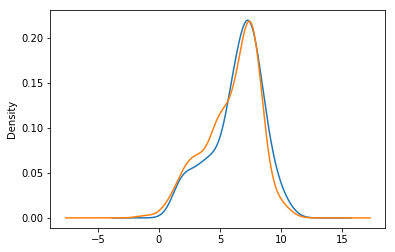

In [347]:
t['Apparent Kd'].apply(lambda x: np.log(x)).plot.kde()
r['Apparent Kd'].apply(lambda x: np.log(x)).plot.kde()


,Drug,R2,Target Classification,Gene Name,cluster_super,cluster_sub
2,Abemaciclib,0.937247,High confidence,BMP2K,5,18
3,Abemaciclib,0.992088,High confidence,CAMK2D,7,22
4,Abemaciclib,0.939239,High confidence,CAMK2G,7,22
5,Abemaciclib,0.910670,High confidence,CAMKK2,4,13
11,Abemaciclib,0.946928,High confidence,CDK16,4,6
12,Abemaciclib,0.847813,High confidence,CDK2,4,6
13,Abemaciclib,0.792027,High confidence,CDK4,4,16
14,Abemaciclib,0.950397,High confidence,CDK6,4,16
15,Abemaciclib,0.991640,High confidence,CDK9,4,6
17,Abemaciclib,0.689329,High confidence,CLK1,4,6


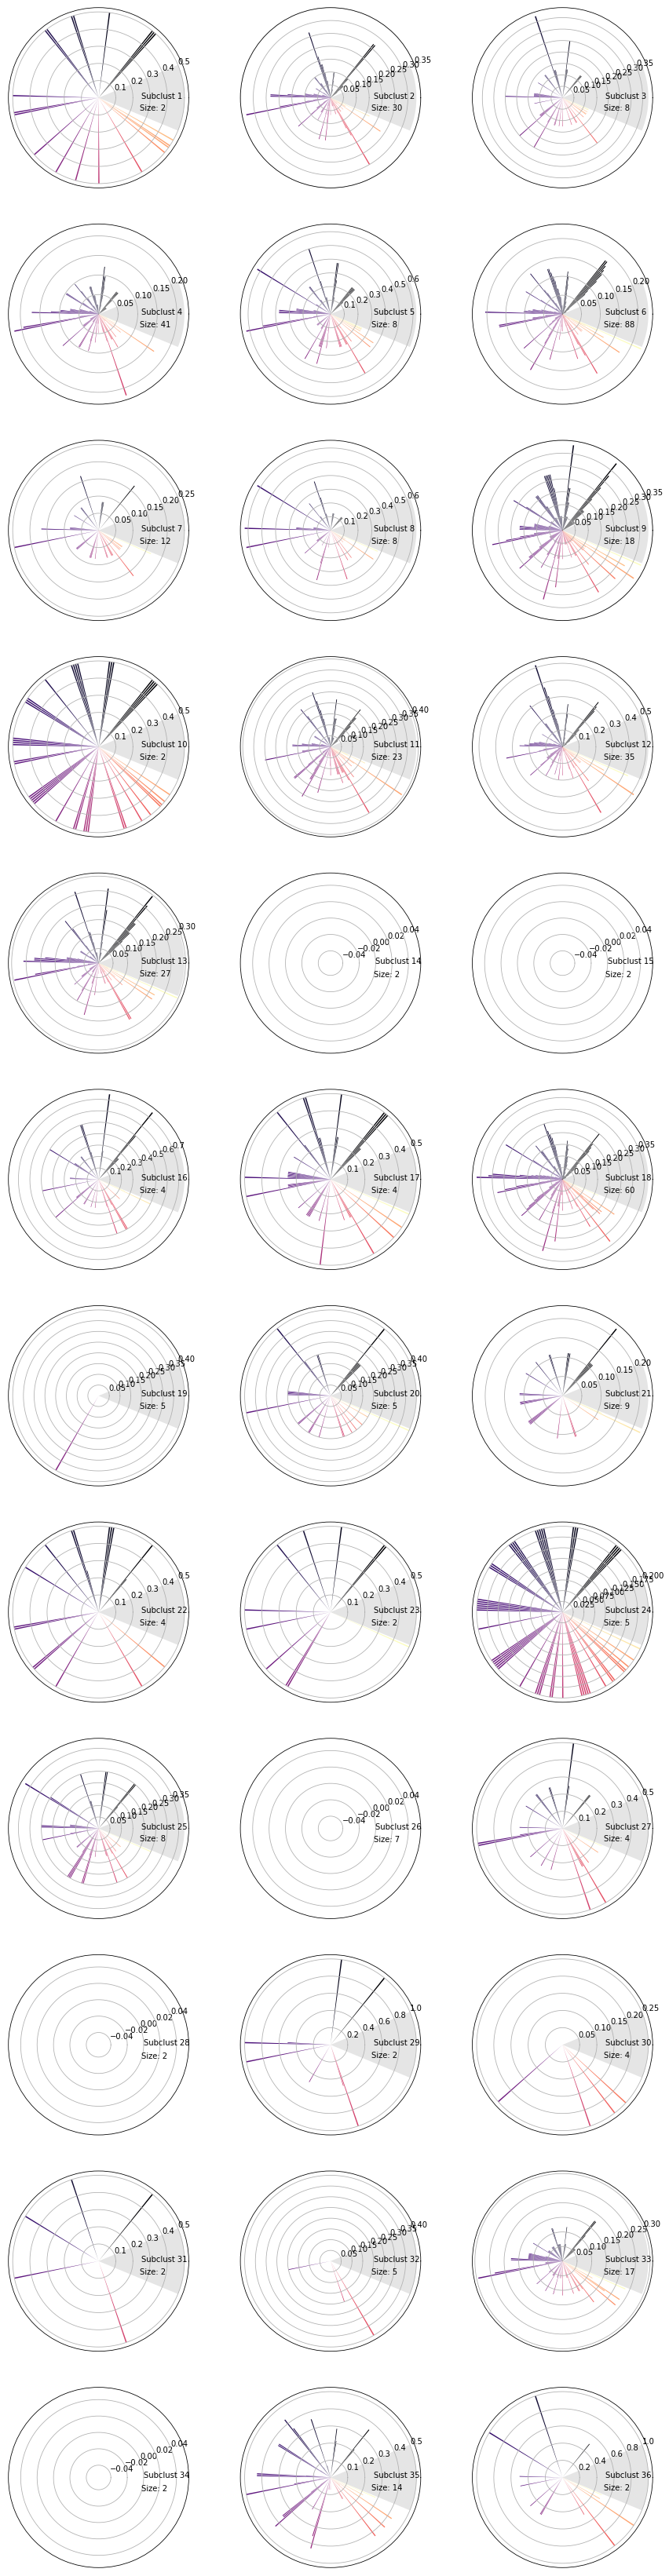

In [482]:
import matplotlib.cm as cm
fig, axes = plt.subplots(ncols=3, nrows=12, figsize=(15,60), subplot_kw=dict(polar=True))
ax_count = 0

for sc in range(1, 37):
    sub_clust_no = sc*1.0
    sub_clust_count = sub_grouping['count'].loc[int(sub_clust_no)]

    proportion_subclust_hit_by_drugs = pd.Series([0.0]*temp_num_drugs, index=temp_drug_list)
    to_overwrite = (temp_dat[temp_dat['cluster_sub']==sub_clust_no].groupby('Drug')['Gene Name'].count()/sub_clust_count).to_dict()
    for k,v in to_overwrite.items():
        proportion_subclust_hit_by_drugs[k] = v

    ax = axes[ax_count//3][ax_count % 3]

    N = temp_num_drugs
    theta = np.arange(np.pi/8, 15*np.pi/8, 7*np.pi/4/N) #- 2*np.pi
    color_scores = [x for x in list(sub_drug_number_clusters_hit.values())]
    radii = proportion_subclust_hit_by_drugs
    width = np.pi*np.ones(N)/N
    
    to_sort = list(zip(color_scores, radii, proportion_subclust_hit_by_drugs))
    color_scores, radii, proportion_subclust_hit_by_drugs = zip(*sorted(to_sort))
    
    min_color = min(color_scores)
    max_color = max(color_scores)
    color_scores = np.array(color_scores)
    
    normalized_color_scores = (color_scores-min_color)/(max_color-min_color)
    
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    
    back_bar = ax.bar([0],[max(radii)], np.pi/4, bottom = 0.0 )
    
    for bar in back_bar:
        bar.set_facecolor(cm.Greys(1.0))
        bar.set_alpha(0.1)

    for c,bar in zip(normalized_color_scores, bars):
        bar.set_facecolor(cm.magma(c))
        #bar.set_alpha(0.5)
    
    ax_count+=1
    
    ax.get_xaxis().set_ticks([])
    ax.text(x=0,y =max(radii)/2, s='Subclust ' + str(sc))
    ax.text(x=61*np.pi/32,y =max(radii)/2, s='Size: ' + str(sub_sizes_dict[sc]))

plt.show()

### HGNC names

In [353]:
hgnc = pd.read_csv('../data/hgnc_alias_list.txt', sep='\t')
hgnc.head()

,HGNC ID,Approved symbol,Approved name,Status,Previous symbols,Synonyms,Chromosome,Accession numbers,RefSeq IDs,NCBI Gene ID(supplied by NCBI),Ensembl ID(supplied by Ensembl),Rat genome database ID(supplied by RGD),Vega ID(supplied by Vega),OMIM ID(supplied by OMIM),RefSeq(supplied by NCBI),UCSC ID(supplied by UCSC),UniProt ID(supplied by UniProt),Mouse genome database ID(supplied by MGI),Name synonyms
0,HGNC:5,A1BG,alpha-1-B glycoprotein,Approved,NaN,NaN,19q13.43,NaN,NM_130786,1.0,ENSG00000121410,RGD:69417,OTTHUMG00000183507,138670,NM_130786,uc002qsd.5,P04217,MGI:2152878,NaN
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,Approved,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,503538.0,ENSG00000268895,NaN,OTTHUMG00000183508,NaN,NR_015380,uc002qse.3,NaN,NaN,NaN
2,HGNC:24086,A1CF,APOBEC1 complementation factor,Approved,NaN,"ACF, ASP, ACF64, ACF65, APOBEC1CF",10q11.23,AF271790,NM_014576,29974.0,ENSG00000148584,RGD:619834,OTTHUMG00000018240,618199,NM_001198818,uc057tgv.1,Q9NQ94,MGI:1917115,NaN
3,HGNC:6,A1S9T~withdrawn,"symbol withdrawn, see UBA1",Symbol Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HGNC:7,A2M,alpha-2-macroglobulin,Approved,NaN,"FWP007, S863-7, CPAMD5",12p13.31,"BX647329, X68728, M11313",NM_000014,2.0,ENSG00000175899,RGD:2004,OTTHUMG00000150267,103950,NM_000014,uc001qvk.2,P01023,MGI:2449119,NaN


In [354]:
hgnc = hgnc[hgnc['Approved symbol'].apply(lambda x: 'withdrawn' not in x)]

# get the original keys
hgnc_original_keys = hgnc['Approved symbol'].unique()

# drop a lot of columns for efficiency
hgnc = hgnc[list(hgnc.columns)[0:6]].drop('Status', axis=1)

# filter out Nan synonyms (not helpful)
hgnc_syn_list = hgnc[~ hgnc.Synonyms.isna()]
hgnc_prev_symb_list = hgnc[~ hgnc['Previous symbols'].isna()]

print(hgnc_syn_list.shape)
print(hgnc_syn_list.columns)
display(hgnc_syn_list.head())

print(hgnc_prev_symb_list.shape)
print(hgnc_prev_symb_list.columns)
display(hgnc_prev_symb_list.head())

(21435, 5)
Index(['HGNC ID', 'Approved symbol', 'Approved name', 'Previous symbols',
       'Synonyms'],
      dtype='object')


,HGNC ID,Approved symbol,Approved name,Previous symbols,Synonyms
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569
2,HGNC:24086,A1CF,APOBEC1 complementation factor,NaN,"ACF, ASP, ACF64, ACF65, APOBEC1CF"
4,HGNC:7,A2M,alpha-2-macroglobulin,NaN,"FWP007, S863-7, CPAMD5"
6,HGNC:23336,A2ML1,alpha-2-macroglobulin like 1,CPAMD9,"FLJ25179, p170"
12,HGNC:30005,A3GALT2,"alpha 1,3-galactosyltransferase 2",A3GALT2P,"IGBS3S, IGB3S"


(11702, 5)
Index(['HGNC ID', 'Approved symbol', 'Approved name', 'Previous symbols',
       'Synonyms'],
      dtype='object')


,HGNC ID,Approved symbol,Approved name,Previous symbols,Synonyms
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569
6,HGNC:23336,A2ML1,alpha-2-macroglobulin like 1,CPAMD9,"FLJ25179, p170"
9,HGNC:8,A2MP1,alpha-2-macroglobulin pseudogene 1,A2MP,NaN
12,HGNC:30005,A3GALT2,"alpha 1,3-galactosyltransferase 2",A3GALT2P,"IGBS3S, IGB3S"
13,HGNC:18149,A4GALT,"alpha 1,4-galactosyltransferase (P blood group)",P1,"A14GALT, Gb3S, P(k)"


In [355]:
#convert the synonyms column to a list
# convert these lists to pd.Series
# merge with original dataframe
#drop old synonyms column 
# melt the new columns into rows


current_syn_list = hgnc_syn_list.Synonyms.apply(lambda x: x.split(',')) \
    .apply(pd.Series) \
    .merge(hgnc, left_index = True, right_index = True) \
    .drop(["Synonyms"], axis = 1) \
    .melt(id_vars = ['HGNC ID', 'Approved symbol', 'Approved name', 'Previous symbols'], value_name = "synonym") 

current_syn_list = current_syn_list[~ current_syn_list.synonym.isna()]
current_syn_list.synonym = current_syn_list.synonym.apply(lambda x: x.replace(' ',''))


current_syn_list.head()

,HGNC ID,Approved symbol,Approved name,Previous symbols,variable,synonym
0,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,"NCRNA00181, A1BGAS, A1BG-AS",0,FLJ23569
1,HGNC:24086,A1CF,APOBEC1 complementation factor,NaN,0,ACF
2,HGNC:7,A2M,alpha-2-macroglobulin,NaN,0,FWP007
3,HGNC:23336,A2ML1,alpha-2-macroglobulin like 1,CPAMD9,0,FLJ25179
4,HGNC:30005,A3GALT2,"alpha 1,3-galactosyltransferase 2",A3GALT2P,0,IGBS3S


In [356]:
prev_symb_list = hgnc_prev_symb_list['Previous symbols'].apply(lambda x: x.split(',')) \
    .apply(pd.Series) \
    .merge(hgnc, left_index = True, right_index = True) \
    .drop(['Previous symbols'], axis = 1) \
    .melt(id_vars = ['HGNC ID', 'Approved symbol', 'Approved name', 'Synonyms'], value_name = "synonym") 

prev_symb_list = prev_symb_list[~ prev_symb_list.synonym.isna()]
prev_symb_list.synonym = prev_symb_list.synonym.apply(lambda x: x.replace(' ',''))


prev_symb_list.head()

,HGNC ID,Approved symbol,Approved name,Synonyms,variable,synonym
0,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,FLJ23569,0,NCRNA00181
1,HGNC:23336,A2ML1,alpha-2-macroglobulin like 1,"FLJ25179, p170",0,CPAMD9
2,HGNC:8,A2MP1,alpha-2-macroglobulin pseudogene 1,NaN,0,A2MP
3,HGNC:30005,A3GALT2,"alpha 1,3-galactosyltransferase 2","IGBS3S, IGB3S",0,A3GALT2P
4,HGNC:18149,A4GALT,"alpha 1,4-galactosyltransferase (P blood group)","A14GALT, Gb3S, P(k)",0,P1


In [368]:
hgnc_mapper = dict(zip(current_syn_list['synonym'], current_syn_list['Approved symbol']))
hgnc_mapper_previous = dict(zip(prev_symb_list['synonym'], prev_symb_list['Approved symbol']))

In [369]:
trouble_list = list(filter(lambda x: hgnc_mapper[x] != hgnc_mapper_previous[x], set(hgnc_mapper.keys())&set(hgnc_mapper_previous.keys())))

for n in louvain_tier1.names:
    if (n in trouble_list):
        print(n)

RAGE


In [370]:
hand_coded = {'RAGE':'MOK', 'SGK2':'SGK2', 'SGK196':'SGK196'}

In [371]:
hgnc_mapper_previous.update(hgnc_mapper) #overwrite the previous symbol conflicts

hgnc_mapper = hgnc_mapper_previous
hgnc_mapper.update({x:x for x in hgnc_original_keys}) #keep the identify maps
hgnc_mapper.update(hand_coded) # overwrite the trouble list

In [372]:
hgnc_mapper['ZAK']

'MAP3K20'

In [376]:
len(set(hgnc_mapper.keys()) & set(dat['Gene Name'].unique()))

529

### There are 8 kinases in Kuster's data that do not show up in the HGNC
### A total of 521 kinases overlap between Kuster's data and HGNC tho

In [397]:
hgnc_raw_dat = pd.read_excel('../data/Klaeger_Science_2017 Supplementary Table 2 Target Lists.xlsx', sheet_name='Kinobeads')
hgnc_raw_dat.head()

,Drug,Lysate,Beads,Gene Name,Relative Intensity DMSO,Relative Intensity 3 nM,Relative Intensity 10 nM,Relative Intensity 30 nM,Relative Intensity 100 nM,Relative Intensity 300 nM,...,Bottom,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification
0,Abemaciclib,4 cell line mix,Kinobeads,AAK1,1,0.905556,0.791054,0.738292,0.639565,0.323354,...,0.009092,0.957905,151.288760,151.288760,45.696999,0.673073,101.828368,0.985386,-20.503519,High confidence
1,Abemaciclib,4 cell line mix,Kinobeads,ADCK1,1,1.045974,0.869866,1.141565,0.000000,0.000000,...,-0.001200,1.014355,63.935536,63.935536,68.832970,0.622595,39.805937,0.983520,-12.606135,High confidence
2,Abemaciclib,4 cell line mix,Kinobeads,BMP2K,1,1.101696,1.012297,1.087891,0.973740,0.863230,...,-1.003278,1.034558,84774.108960,84774.108960,217756.243215,0.660952,56031.642989,0.937247,-15.330485,High confidence
3,Abemaciclib,4 cell line mix,Kinobeads,CAMK2D,1,0.894551,0.984481,0.900583,0.440384,0.178266,...,0.018690,0.972850,95.373379,95.373379,12.131433,0.203913,19.447883,0.992088,-22.486948,High confidence
4,Abemaciclib,4 cell line mix,Kinobeads,CAMK2G,1,1.125435,1.565245,1.236451,0.315507,0.139777,...,0.043265,1.232332,82.363844,82.363844,NaN,0.217204,17.889794,0.939239,1.734623,High confidence


In [398]:
double_drug_targets = hgnc_raw_dat[hgnc_raw_dat['Gene Name'].apply(lambda x: ';' in x)]
#double_drug_targets.shape

first_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[0])
second_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[1])

repaired_double_targets = double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':first_genes})
repaired_double_targets = repaired_double_targets.append(double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':second_genes})) 
#repaired_double_targets = repaired_double_targets[cols_to_keep]

hgnc_raw_dat = hgnc_raw_dat.drop(double_drug_targets.index).append(repaired_double_targets)
hgnc_raw_dat.head()



/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Apparent Kd,BIC,Beads,Bottom,Correction Factor,DMSO Intensity,Drug,EC50,EC50 Standard Error,Gene Name,...,Relative Intensity 1000 nM,Relative Intensity 3 nM,Relative Intensity 30 nM,Relative Intensity 300 nM,Relative Intensity 3000 nM,Relative Intensity 30000 nM,Relative Intensity DMSO,Slope,Target Classification,Top
0,101.828368,-20.503519,Kinobeads,0.009092,0.673073,136300000,Abemaciclib,151.288760,45.696999,AAK1,...,0.181984,0.905556,0.738292,0.323354,0.063421,0.057103,1,0.773714,High confidence,0.957905
1,39.805937,-12.606135,Kinobeads,-0.001200,0.622595,10460000,Abemaciclib,63.935536,68.832970,ADCK1,...,0.000000,1.045974,1.141565,0.000000,0.000000,0.000000,1,12.051439,High confidence,1.014355
2,56031.642989,-15.330485,Kinobeads,-1.003278,0.660952,72050000,Abemaciclib,84774.108960,217756.243215,BMP2K,...,0.885498,1.101696,1.087891,0.863230,0.862572,0.313434,1,0.603088,High confidence,1.034558
3,19.447883,-22.486948,Kinobeads,0.018690,0.203913,888660000,Abemaciclib,95.373379,12.131433,CAMK2D,...,0.021331,0.894551,0.900583,0.178266,0.004220,0.017424,1,1.774882,High confidence,0.972850
4,17.889794,1.734623,Kinobeads,0.043265,0.217204,266400000,Abemaciclib,82.363844,NaN,CAMK2G,...,0.013431,1.125435,1.236451,0.139777,0.005382,0.017473,1,6.255996,High confidence,1.232332


In [399]:
hgnc_raw_to_keep =  hgnc_raw_dat['Gene Name'].isin(hgnc_mapper.keys())
hgnc_raw_dat = hgnc_raw_dat[hgnc_raw_to_keep]

hgnc_raw_dat['Gene Name'] = hgnc_raw_dat['Gene Name'].apply(lambda x: hgnc_mapper[x])

In [400]:
hgnc_raw_dat = hgnc_raw_dat[columns]
hgnc_raw_dat.head()

,Drug,Lysate,Beads,Gene Name,Relative Intensity DMSO,Relative Intensity 3 nM,Relative Intensity 10 nM,Relative Intensity 30 nM,Relative Intensity 100 nM,Relative Intensity 300 nM,...,Bottom,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification
0,Abemaciclib,4 cell line mix,Kinobeads,AAK1,1,0.905556,0.791054,0.738292,0.639565,0.323354,...,0.009092,0.957905,151.288760,151.288760,45.696999,0.673073,101.828368,0.985386,-20.503519,High confidence
1,Abemaciclib,4 cell line mix,Kinobeads,ADCK1,1,1.045974,0.869866,1.141565,0.000000,0.000000,...,-0.001200,1.014355,63.935536,63.935536,68.832970,0.622595,39.805937,0.983520,-12.606135,High confidence
2,Abemaciclib,4 cell line mix,Kinobeads,BMP2K,1,1.101696,1.012297,1.087891,0.973740,0.863230,...,-1.003278,1.034558,84774.108960,84774.108960,217756.243215,0.660952,56031.642989,0.937247,-15.330485,High confidence
3,Abemaciclib,4 cell line mix,Kinobeads,CAMK2D,1,0.894551,0.984481,0.900583,0.440384,0.178266,...,0.018690,0.972850,95.373379,95.373379,12.131433,0.203913,19.447883,0.992088,-22.486948,High confidence
4,Abemaciclib,4 cell line mix,Kinobeads,CAMK2G,1,1.125435,1.565245,1.236451,0.315507,0.139777,...,0.043265,1.232332,82.363844,82.363844,NaN,0.217204,17.889794,0.939239,1.734623,High confidence


In [401]:
sub_clust_dict = {hgnc_mapper[x]:y for x,y in sub_clust_dict.items()}

In [404]:
sub_clust_dict

{'PAK1': 3,
 'ERBB2': 18,
 'MST1R': 18,
 'YES1': 18,
 'TYRO3': 18,
 'LYN': 4,
 'KIT': 18,
 'PRKCA': 5,
 'SRC': 18,
 'MATK': 18,
 'TEC': 18,
 'FGR': 18,
 'SYK': 4,
 'PTK2': 18,
 'KDR': 18,
 'FLT1': 4,
 'ATR': 6,
 'TYK2': 20,
 'PRKCD': 4,
 'BTK': 4,
 'PRKCQ': 9,
 'PRKDC': 6,
 'PTK2B': 18,
 'PIK3CG': 4,
 'MAPK3': 2,
 'MAP4K1': 12,
 'PDGFRB': 18,
 'PIK3CA': 4,
 'PFKM': 30,
 'PFKL': 30,
 'PHKG1': 1,
 'PHKG2': 1,
 'PDGFRA': 18,
 'EIF2AK2': 20,
 'MAP3K5': 12,
 'IKBKB': 9,
 'MAPK1': 2,
 'MAP2K1': 2,
 'ARAF': 2,
 'RPS6KA2': 2,
 'MAP3K4': 12,
 'RPS6KA4': 2,
 'TRIB1': 12,
 'KSR2': 2,
 'EPHA8': 35,
 'EPHA2': 35,
 'ABL1': 18,
 'ZAP70': 10,
 'PRKCE': 2,
 'NTRK3': 2,
 'RPS6KA3': 2,
 'MAPK14': 11,
 'MAP2K2': 2,
 'RPS6KA1': 2,
 'NEK2': 33,
 'DYRK1B': 11,
 'MKNK2': 2,
 'MAPKAPK5': 11,
 'MKNK1': 2,
 'PRKCZ': 4,
 'MYLK': 3,
 'GSK3A': 4,
 'PRKCB': 4,
 'BMPR2': 8,
 'MAPK6': 24,
 'GSK3B': 4,
 'PDPK1': 4,
 'RIPK4': 4,
 'HK2': 18,
 'PIK3CB': 4,
 'PRKD1': 5,
 'AKT3': 4,
 'PRKCG': 5,
 'MARK4': 33,
 'IRAK1': 12,


In [426]:
hgnc_sub = copy(hgnc_raw_dat)

# filter to the 473 kinases that we have in the network
hgnc_sub = hgnc_sub[hgnc_sub['Gene Name'].isin(sub_clust_dict.keys())]
hgnc_sub['subclust'] = hgnc_sub['Gene Name'].apply(lambda x: sub_clust_dict[x])

display(hgnc_sub)

,Drug,Lysate,Beads,Gene Name,Relative Intensity DMSO,Relative Intensity 3 nM,Relative Intensity 10 nM,Relative Intensity 30 nM,Relative Intensity 100 nM,Relative Intensity 300 nM,...,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification,subclust
2,Abemaciclib,4 cell line mix,Kinobeads,BMP2K,1,1.101696,1.012297,1.087891,0.973740,0.863230,...,1.034558,84774.108960,84774.108960,217756.243215,0.660952,56031.642989,0.937247,-15.330485,High confidence,18
3,Abemaciclib,4 cell line mix,Kinobeads,CAMK2D,1,0.894551,0.984481,0.900583,0.440384,0.178266,...,0.972850,95.373379,95.373379,12.131433,0.203913,19.447883,0.992088,-22.486948,High confidence,22
4,Abemaciclib,4 cell line mix,Kinobeads,CAMK2G,1,1.125435,1.565245,1.236451,0.315507,0.139777,...,1.232332,82.363844,82.363844,NaN,0.217204,17.889794,0.939239,1.734623,High confidence,22
5,Abemaciclib,4 cell line mix,Kinobeads,CAMKK2,1,0.926425,0.861896,0.941537,0.742063,0.619142,...,0.920528,3911.214633,3911.214633,3766.167406,0.664348,2598.406804,0.910670,-7.532827,High confidence,13
11,Abemaciclib,4 cell line mix,Kinobeads,CDK16,1,1.113276,0.668597,0.923386,0.000000,0.000000,...,0.928950,53.281715,53.281715,72.299011,0.942646,50.225813,0.946928,-3.373663,High confidence,6
12,Abemaciclib,4 cell line mix,Kinobeads,CDK2,1,0.881417,0.978950,0.804046,0.689487,0.866051,...,0.970421,19694.995051,19694.995051,49550.393838,0.532482,10487.223649,0.847813,-11.284221,High confidence,6
13,Abemaciclib,4 cell line mix,Kinobeads,CDK4,1,2.108224,2.398064,2.558361,0.638239,0.669925,...,2.016114,96.549434,96.549434,207.336584,1.000000,96.549434,0.792027,21.981850,High confidence,16
14,Abemaciclib,4 cell line mix,Kinobeads,CDK6,1,0.983592,1.161626,0.806036,0.449799,0.000000,...,1.039928,71.427951,71.427951,24.258716,0.819855,58.560591,0.950397,-4.864032,High confidence,16
15,Abemaciclib,4 cell line mix,Kinobeads,CDK9,1,1.057899,1.006491,0.858902,0.804875,0.470718,...,1.024122,245.175144,245.175144,45.027568,0.711499,174.441836,0.991640,-24.093280,High confidence,6
17,Abemaciclib,4 cell line mix,Kinobeads,CLK1,1,1.154402,0.000000,0.696317,0.000000,0.000000,...,1.090228,9.255926,9.255926,15.302064,0.715477,6.622406,0.689329,12.076126,High confidence,6


In [427]:
hgnc_sub.columns

Index(['Drug', 'Lysate', 'Beads', 'Gene Name', 'Relative Intensity DMSO',
       'Relative Intensity 3 nM', 'Relative Intensity 10 nM',
       'Relative Intensity 30 nM', 'Relative Intensity 100 nM',
       'Relative Intensity 300 nM', 'Relative Intensity 1000 nM',
       'Relative Intensity 3000 nM', 'Relative Intensity 30000 nM',
       'DMSO Intensity', 'Intensity Type', 'Slope', 'Bottom', 'Top',
       'Inflection', 'EC50', 'EC50 Standard Error', 'Correction Factor',
       'Apparent Kd', 'R2', 'BIC', 'Target Classification', 'subclust'],
      dtype='object')

In [428]:
cols_to_keep = ['Drug', 'Gene Name', 'Relative Intensity DMSO', 'DMSO Intensity', 'Intensity Type', 'Slope', 'Bottom', 'Top',
       'Inflection', 'EC50', 'EC50 Standard Error', 'Correction Factor',
       'Apparent Kd', 'R2', 'BIC', 'Target Classification', 'subclust']
hgnc_sub = hgnc_sub[cols_to_keep]



In [429]:
hgnc_sub['Specificity (Proportion)'] = hgnc_sub['Drug'].apply(lambda x: sub_drug_number_clusters_hit[x])

In [430]:
hgnc_sub['Cluster Size'] = hgnc_sub['subclust'].apply((lambda x: sub_sizes_dict[x]))
#hgnc_sub['Subclust Proportion Hit'] = hgnc_sub['subclust'].apply((lambda x: sub_sizes_dict[x]))

In [434]:
to_overwrite

{'ACTB-1003': 0.5,
 'AEW-541': 1.0,
 'AMG-900': 0.5,
 'ASP-3026': 1.0,
 'AT-13148': 0.5,
 'AT-7519': 1.0,
 'AT-9283': 4.5,
 'AV-412': 0.5,
 'AZD-5363': 2.0,
 'AZD-5438': 1.0,
 'AZD-7762': 2.5,
 'Abemaciclib': 2.0,
 'Alisertib': 0.5,
 'Alvocidib': 1.5,
 'Apitolisib': 0.5,
 'BGT-226': 0.5,
 'BI-847325': 1.5,
 'BMS-387032': 1.0,
 'BMS-690514': 1.5,
 'BMS-754807': 0.5,
 'Bafetinib': 0.5,
 'Barasertib': 0.5,
 'Baricitinib': 2.0,
 'Bosutinib': 1.0,
 'CEP-32496': 0.5,
 'Cabozantinib': 0.5,
 'Canertinib': 0.5,
 'Cerdulatinib': 1.5,
 'Ceritinib': 0.5,
 'Crenolanib': 1.5,
 'Cyc-116': 1.0,
 'Dabrafenib': 0.5,
 'Danusertib': 1.5,
 'Dasatinib': 1.5,
 'Decernotinib': 1.0,
 'Defactinib': 1.5,
 'Dinaciclib': 1.0,
 'Dovitinib': 1.0,
 'Encorafenib': 1.0,
 'Enzastaurin': 2.0,
 'Fasudil': 0.5,
 'Foretinib': 1.0,
 'GDC-0994': 1.0,
 'GSK-1070916': 1.0,
 'GSK-2110183': 2.0,
 'GSK-690693': 4.5,
 'Gilteritinib': 0.5,
 'Golvatinib': 0.5,
 'Ibrutinib': 1.0,
 'JNJ-26483327': 0.5,
 'K-252a': 1.5,
 'KW-2449': 1.0,


In [437]:
sub_clust_no = 4.0
sub_clust_count = sub_grouping['count'].loc[int(sub_clust_no)]

proportion_subclust_hit_by_drugs = pd.Series([0.0]*temp_num_drugs, index=temp_drug_list)
to_overwrite = (temp_dat[temp_dat['cluster_sub']==sub_clust_no].groupby('Drug')['Gene Name'].count()/sub_clust_count).to_dict()
for k,v in to_overwrite.items():
    proportion_subclust_hit_by_drugs[k] = v
    
hgnc_4 = copy(hgnc_sub[hgnc_sub['subclust'] == 4])
hgnc_4.head()

,Drug,Gene Name,Relative Intensity DMSO,DMSO Intensity,Intensity Type,Slope,Bottom,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification,subclust,Specificity (Proportion),Cluster Size
28,Abemaciclib,GSK3A,1,269450000,Normalized LFQ intensity,1.541662,0.079406,0.979373,26.695128,26.695128,3.410249,0.500216,13.353331,0.992684,-25.368461,High confidence,4,0.250000,41
29,Abemaciclib,GSK3B,1,259560000,Normalized LFQ intensity,9.972651,0.176110,1.109954,28.460157,28.460157,10.977841,0.464999,13.233941,0.955991,-6.527968,High confidence,4,0.250000,41
37,Abemaciclib,PRKCB,1,126380000,Normalized LFQ intensity,1.234061,0.197431,1.130691,2035.486478,2035.486478,1734.476770,0.797918,1624.152203,0.808058,2.255955,High confidence,4,0.250000,41
38,Abemaciclib,PRKCD,1,21812000,Normalized LFQ intensity,2.753630,0.453867,1.242071,839.100253,839.100253,300.640067,0.947106,794.717066,0.882501,-1.739531,High confidence,4,0.250000,41
57,ACTB-1003,PRKCD,1,40389000,Normalized LFQ intensity,0.863712,0.463867,1.006146,5359.499131,5359.499131,7817.972149,0.947106,5076.014940,0.918617,-20.701448,High confidence,4,0.194444,41


In [441]:
hgnc_4['Proportion Subclust Hit'] = hgnc_4.Drug.apply(lambda x: proportion_subclust_hit_by_drugs.to_dict()[x])
hgnc_4.to_csv('/Users/isrobson/Downloads/subcluster_4_Klaeger2017_data.csv')

In [450]:
sub_clust_no = 6.0
sub_clust_count = sub_grouping['count'].loc[int(sub_clust_no)]

proportion_subclust_hit_by_drugs = pd.Series([0.0]*temp_num_drugs, index=temp_drug_list)
to_overwrite = (temp_dat[temp_dat['cluster_sub']==sub_clust_no].groupby('Drug')['Gene Name'].count()/sub_clust_count).to_dict()
for k,v in to_overwrite.items():
    proportion_subclust_hit_by_drugs[k] = v
    
hgnc_4 = copy(hgnc_sub[hgnc_sub['subclust'] == 6])
hgnc_4.head()

,Drug,Gene Name,Relative Intensity DMSO,DMSO Intensity,Intensity Type,Slope,Bottom,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification,subclust,Specificity (Proportion),Cluster Size
11,Abemaciclib,CDK16,1,8626100,Normalized LFQ intensity,7.818138,-0.001169,0.928950,53.281715,53.281715,72.299011,0.942646,50.225813,0.946928,-3.373663,High confidence,6,0.25,88
12,Abemaciclib,CDK2,1,274510000,Normalized LFQ intensity,0.342122,-0.064158,0.970421,19694.995051,19694.995051,49550.393838,0.532482,10487.223649,0.847813,-11.284221,High confidence,6,0.25,88
15,Abemaciclib,CDK9,1,179700000,Normalized LFQ intensity,1.040728,0.063622,1.024122,245.175144,245.175144,45.027568,0.711499,174.441836,0.991640,-24.093280,High confidence,6,0.25,88
17,Abemaciclib,CLK1,1,5270900,Normalized LFQ intensity,1.038648,-0.001140,1.090228,9.255926,9.255926,15.302064,0.715477,6.622406,0.689329,12.076126,High confidence,6,0.25,88
18,Abemaciclib,CLK4,1,1562300,Normalized Intensity,1.020842,0.010091,1.157794,15.704897,15.704897,NaN,0.845040,13.271266,0.690996,13.051799,Low confidence,6,0.25,88


In [451]:
hgnc_4['Proportion Subclust Hit'] = hgnc_4.Drug.apply(lambda x: proportion_subclust_hit_by_drugs.to_dict()[x])
hgnc_4.to_csv('/Users/isrobson/Downloads/subcluster_6_Klaeger2017_data.csv')

In [449]:
pd.Series(hgnc_raw_dat['Drug'].unique()).to_csv('/Users/isrobson/Downloads/Klaeger2017_total_drug_list.csv')